In [202]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize
from PIL import Image
from collections import Counter 

# Add the scripts folder to the system path
import sys
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
scripts_path = os.path.join(repo_root, "scripts")
sys.path.append(scripts_path)
# Import and execute the dataset download function
from download_image_dataset import download_dataset
download_dataset()

Dataset already exists. Skipping download.


In [204]:
def load_images_from_folders(base_path, image_size=(128, 128)):
    images = []
    labels = []
    
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        
        if os.path.isdir(folder_path):
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                try:
                    # Use Pillow to load and resize the image
                    img = Image.open(img_path)
                    img = img.resize(image_size)
                    img = img.convert('RGB')  # Ensure consistent color mode
                    
                    # Convert to NumPy array
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(folder)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    
    return images, labels

In [206]:
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Convert to grayscale
        img_gray = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
        
        # Extract HOG features
        fd, hog_image = hog(img_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
    
    return np.array(hog_features)


In [208]:
def cluster_images(features, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    return kmeans.labels_

In [210]:
def visualize_clusters(images, cluster_labels):
    unique_labels = np.unique(cluster_labels)
    for i in unique_labels:
        plt.figure(figsize=(10, 5))
        plt.title(f"Cluster {i}")
        cluster_images = [images[j] for j in range(len(cluster_labels)) if cluster_labels[j] == i]
        
        for j, img in enumerate(cluster_images):
            plt.subplot(1, len(cluster_images), j + 1)
            plt.imshow(img)  # Ensure the correct format
            plt.axis('off')
        plt.show()

In [212]:
def main():
    # dynamicallly determine the repository root and dataset path
    repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
    base_path = os.path.join(repo_root, "data", "test")  # Use the test dataset

    # Load images and labels
    images, labels = load_images_from_folders(base_path, image_size=(150, 150)) # override default use 150x150 same as used in CNN later
    
    # Check iff images are loaded
    if len(images) == 0:
        print("No images found. Please check the dataset path.")
        return
    
    # Extract HOG features
    print("Extracting HOG features...")
    hog_features = extract_hog_features(images)
    
    # Standardize features
    print("Standardizing features...")
    scaler = StandardScaler()
    hog_features_scaled = scaler.fit_transform(hog_features)
    
    # Perform clustering
    print("Clustering images...")
    cluster_labels = cluster_images(hog_features_scaled)
    
    # Count and print the  clusters
    cluster_counts = {}
    for i in np.unique(cluster_labels):
        print(f"Cluster {i}:")
        cluster_categories = [labels[j] for j in range(len(cluster_labels)) if cluster_labels[j] == i]
        for j in range(len(cluster_labels)):
            if cluster_labels[j] == i:
                print(f"  - {labels[j]} (Image {j})")
        # count occurrences of each category in the cluster
        cluster_counts[i] = Counter(cluster_categories)

    # Print summaryu count
    print("\nSummary of Categories in Each Cluster:")
    for cluster, counts in cluster_counts.items():
        print(f"Cluster {cluster}:")
        for category, count in counts.items():
            print(f"  {category}: {count}")
    
    # Visualize clusters
    visualize_clusters(images, cluster_labels)

Extracting HOG features...
Standardizing features...
Clustering images...
Cluster 0:
  - adenocarcinoma (Image 2)
  - adenocarcinoma (Image 3)
  - adenocarcinoma (Image 4)
  - adenocarcinoma (Image 6)
  - adenocarcinoma (Image 8)
  - adenocarcinoma (Image 12)
  - adenocarcinoma (Image 13)
  - adenocarcinoma (Image 18)
  - adenocarcinoma (Image 21)
  - adenocarcinoma (Image 23)
  - adenocarcinoma (Image 24)
  - adenocarcinoma (Image 28)
  - adenocarcinoma (Image 30)
  - adenocarcinoma (Image 32)
  - adenocarcinoma (Image 36)
  - adenocarcinoma (Image 37)
  - adenocarcinoma (Image 38)
  - adenocarcinoma (Image 39)
  - adenocarcinoma (Image 41)
  - adenocarcinoma (Image 42)
  - adenocarcinoma (Image 44)
  - adenocarcinoma (Image 45)
  - adenocarcinoma (Image 46)
  - adenocarcinoma (Image 47)
  - adenocarcinoma (Image 53)
  - adenocarcinoma (Image 54)
  - adenocarcinoma (Image 55)
  - adenocarcinoma (Image 57)
  - adenocarcinoma (Image 61)
  - adenocarcinoma (Image 62)
  - adenocarcinoma (

C:\Users\yoshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


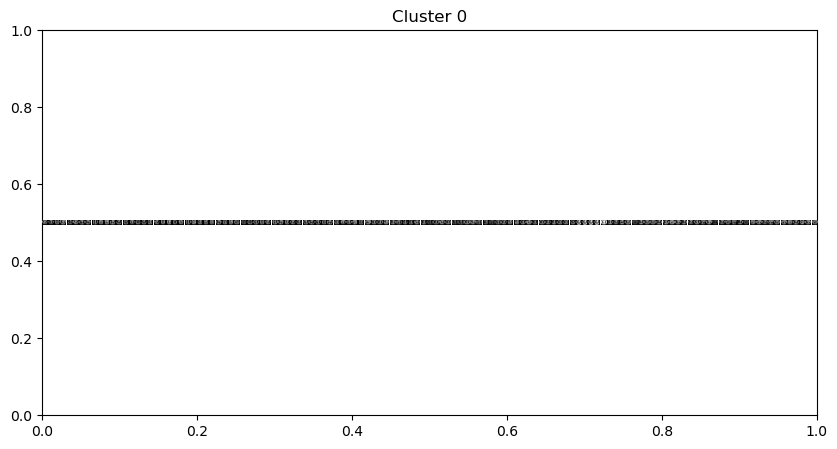

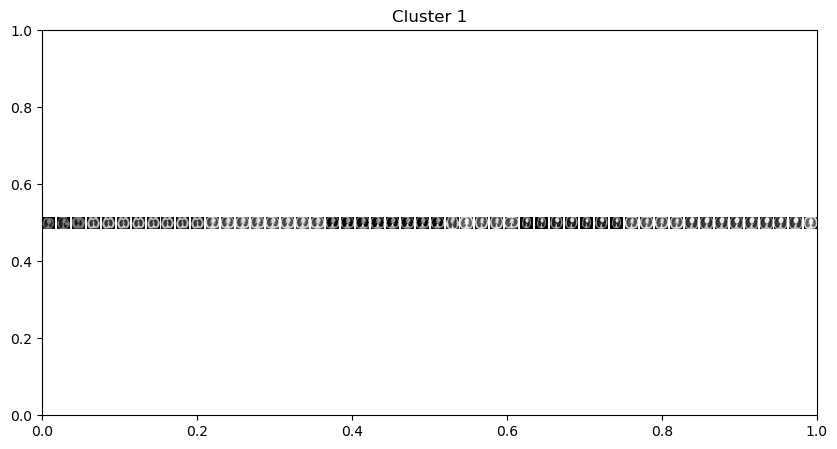

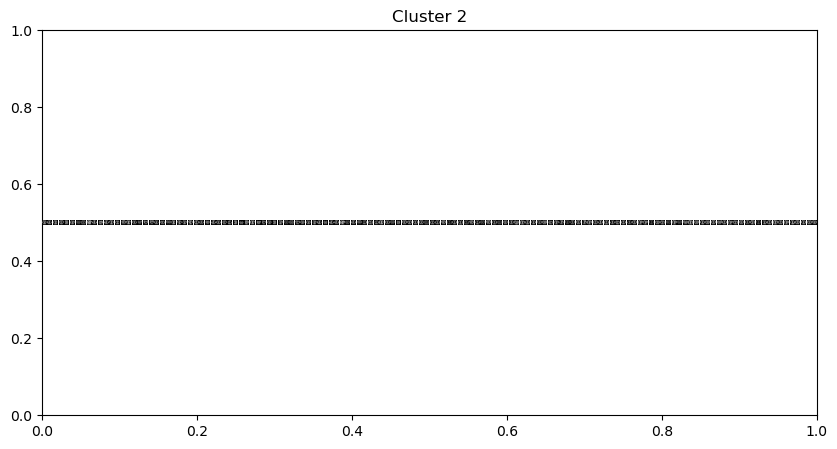

In [214]:
#Call main
if __name__ == '__main__':
    main()